# All major disasters

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
data = pd.read_csv('natural_disasters_dataset.csv')

# Displaying information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [ ]:
data.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


### Visualizations for EDA

<Figure size 1200x600 with 0 Axes>

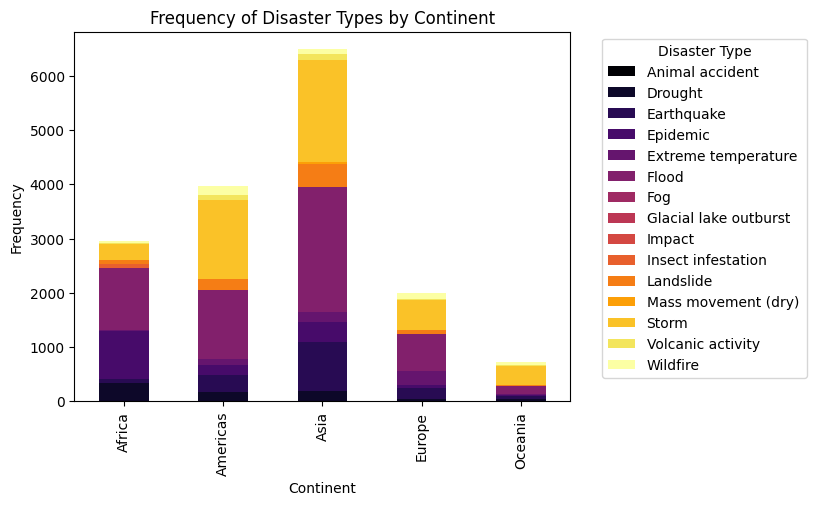

In [ ]:
import matplotlib.pyplot as plt

# For this plot, we are grouping the data by 'Continent' and 'Disaster Type' and counting the frequency of the Disaster Type
disaster_counts = data.groupby(['Continent', 'Disaster Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
disaster_counts.plot(kind='bar', stacked=True, colormap='inferno')

plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Frequency of Disaster Types by Continent')

plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
top_continents = disaster_counts.sum(axis=1).nlargest(5)
print("Continents where the disasters occurred more, in descending order:")
print(top_continents)

Continents where the disasters occurred more, in descending order:
Continent
Asia        6490
Americas    3971
Africa      2946
Europe      1997
Oceania      722
dtype: int64


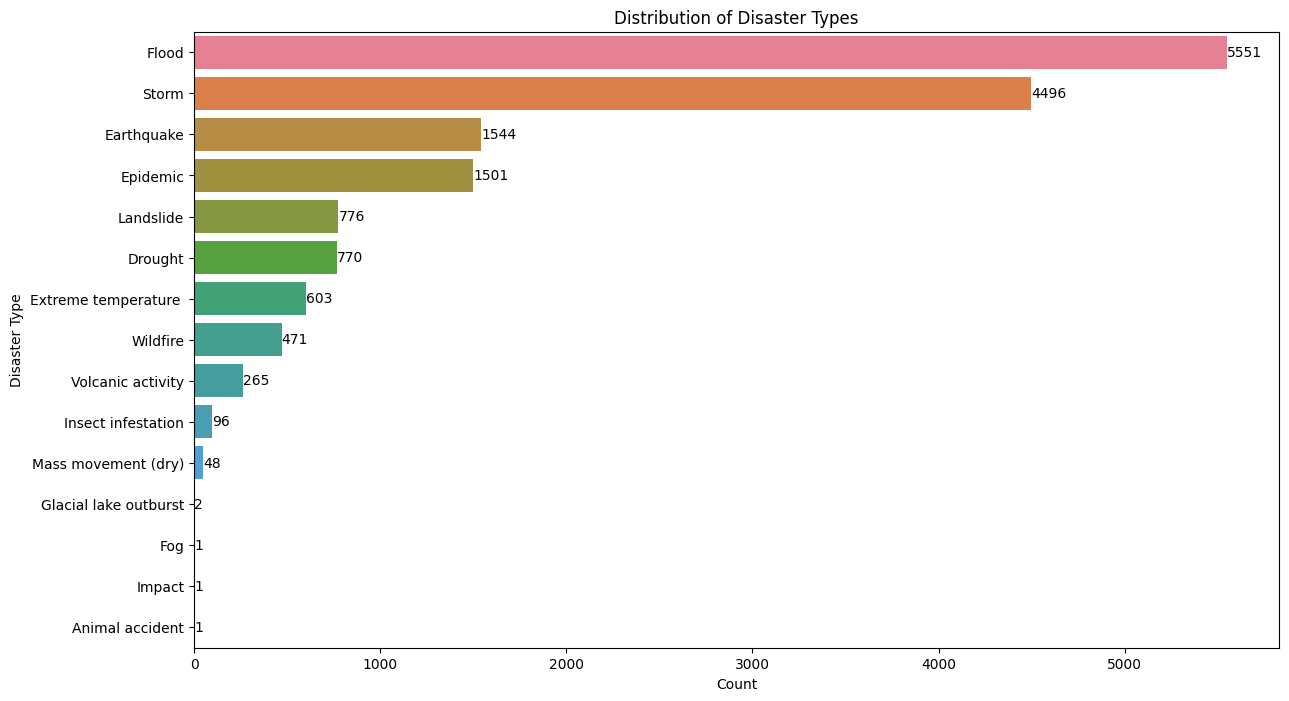

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 8))
disaster_type_counts = data['Disaster Type'].value_counts()

sns.barplot(x=disaster_type_counts, y=disaster_type_counts.index, hue=disaster_type_counts.index)

# Displaying the frequency count
for index, value in enumerate(disaster_type_counts):
    plt.text(value, index, str(value), va='center', fontsize=10, color='black', ha='left')

# Setting x and y labels and Title for the plot
plt.title('Distribution of Disaster Types')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.show()

### Preprocessing

In [ ]:
# Choosing only relevant features
selected_features = [
    'Year', 'Country', 'Longitude', 'Latitude', 'Dis Mag Scale', 'Disaster Type'
]
data = data[selected_features]
data

,Year,Country,Longitude,Latitude,Dis Mag Scale,Disaster Type
0,1900,Cabo Verde,NaN,NaN,Km2,Drought
1,1900,India,NaN,NaN,Km2,Drought
2,1902,Guatemala,-91,14,Richter,Earthquake
3,1902,Guatemala,NaN,NaN,NaN,Volcanic activity
4,1902,Guatemala,NaN,NaN,NaN,Volcanic activity
...,...,...,...,...,...,...
16121,2021,Yemen,NaN,NaN,Km2,Flood
16122,2021,South Africa,NaN,NaN,Km2,Flood
16123,2021,Congo (the Democratic Republic of the),NaN,NaN,Vaccinated,Epidemic
16124,2021,Serbia,NaN,NaN,Km2,Flood


In [ ]:
data['Dis Mag Scale'].unique()

array(['Km2', 'Richter', nan, 'Kph', 'Vaccinated', '°C'], dtype=object)

In [ ]:
# Choosing only India data
data = data[data['Country'] == 'India']
data

,Year,Country,Longitude,Latitude,Dis Mag Scale,Disaster Type
1,1900,India,NaN,NaN,Km2,Drought
9,1905,India,76.16,32.04,Richter,Earthquake
16,1907,India,NaN,NaN,Vaccinated,Epidemic
41,1916,India,NaN,NaN,Kph,Storm
58,1920,India,NaN,NaN,Vaccinated,Epidemic
...,...,...,...,...,...,...
15892,2021,India,NaN,NaN,Kph,Storm
15893,2021,India,NaN,NaN,Kph,Storm
15894,2021,India,NaN,NaN,Kph,Storm
15895,2021,India,NaN,NaN,Km2,Flood


In [ ]:
data = data.drop('Country', axis=1)
data

,Year,Longitude,Latitude,Dis Mag Scale,Disaster Type
1,1900,NaN,NaN,Km2,Drought
9,1905,76.16,32.04,Richter,Earthquake
16,1907,NaN,NaN,Vaccinated,Epidemic
41,1916,NaN,NaN,Kph,Storm
58,1920,NaN,NaN,Vaccinated,Epidemic
...,...,...,...,...,...
15892,2021,NaN,NaN,Kph,Storm
15893,2021,NaN,NaN,Kph,Storm
15894,2021,NaN,NaN,Kph,Storm
15895,2021,NaN,NaN,Km2,Flood


In [ ]:
data.isnull().sum()

,0
Year,0
Longitude,659
Latitude,659
Dis Mag Scale,58
Disaster Type,0


In [ ]:
# filling missing values with mean
from sklearn.impute import SimpleImputer

# first for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# then for categorical columns
categorical_cols = data.select_dtypes(include='object').columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

In [ ]:
data.isnull().sum()

,0
Year,0
Longitude,0
Latitude,0
Dis Mag Scale,0
Disaster Type,0


In [ ]:
data

,Year,Longitude,Latitude,Dis Mag Scale,Disaster Type
1,1900.0,76.05,15.71,Km2,Drought
9,1905.0,76.16,32.04,Richter,Earthquake
16,1907.0,76.05,15.71,Vaccinated,Epidemic
41,1916.0,76.05,15.71,Kph,Storm
58,1920.0,76.05,15.71,Vaccinated,Epidemic
...,...,...,...,...,...
15892,2021.0,76.05,15.71,Kph,Storm
15893,2021.0,76.05,15.71,Kph,Storm
15894,2021.0,76.05,15.71,Kph,Storm
15895,2021.0,76.05,15.71,Km2,Flood


In [ ]:
categorical_cols

Index(['Longitude', 'Latitude', 'Dis Mag Scale', 'Disaster Type'], dtype='object')

In [ ]:
# encoding categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

data

,Year,Longitude,Latitude,Dis Mag Scale,Disaster Type
1,1900.0,19,13,0,0
9,1905.0,21,79,2,1
16,1907.0,19,13,3,2
41,1916.0,19,13,1,9
58,1920.0,19,13,3,2
...,...,...,...,...,...
15892,2021.0,19,13,1,9
15893,2021.0,19,13,1,9
15894,2021.0,19,13,1,9
15895,2021.0,19,13,0,4


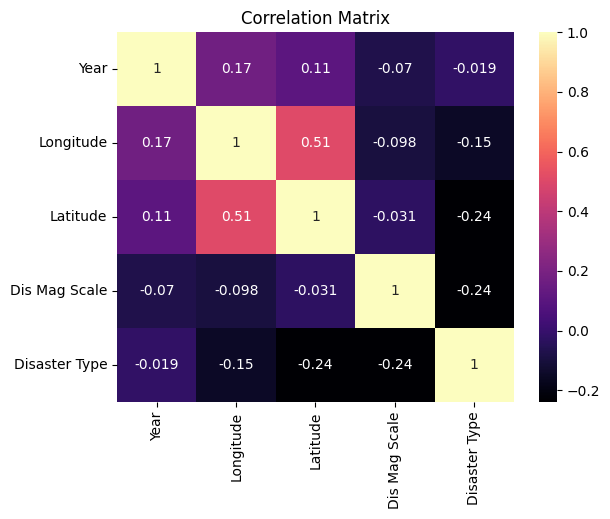

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

## Building and training models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
# establishing variables
X = data.drop('Disaster Type', axis=1)
y = data['Disaster Type']

# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Decision Tree

In [ ]:
# building the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# evaluating model
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree classifier:")
print("Accuracy: %f"%(accuracy_score(y_test,y_pred_dt)*100))
print("Recall: %f"%(recall_score(y_test,y_pred_dt, average='weighted')*100))

Decision Tree classifier:
Accuracy: 87.417219
Recall: 87.417219


### 2. Support Vector Machine

In [ ]:
# building the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# evaluating model
y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm)*100)
print("Recall:", recall_score(y_test,y_pred_svm, average='weighted'))

Support Vector Machine (SVM):
Accuracy: 45.033112582781456
Recall: 0.4503311258278146


### 3. KNN model

In [ ]:
# building model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# evaluating model
y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors (KNN):
Accuracy: 0.7417218543046358


## Comparing models

In [ ]:
# Decision Tree
print("Decision Tree evaluation metrics:")
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_dt, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("\n")

# SVM
print("Support Vector Machine (SVM)-Evaluation Metrics:")
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_svm, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("\n")

# K-NN
print("K-Nearest Neighbor (K-NN)-Evaluation Metrics:")
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_knn, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))

Decision Tree evaluation metrics:
F1 Score: 0.8366149606649185
Accuracy: 0.8741721854304636
Recall (Sensitivity): 0.8741721854304636
Precision: 0.8050854386395225


Support Vector Machine (SVM)-Evaluation Metrics:
F1 Score: 0.27965768544558345
Accuracy: 0.4503311258278146
Recall (Sensitivity): 0.4503311258278146
Precision: 0.20279812288934695


K-Nearest Neighbor (K-NN)-Evaluation Metrics:
F1 Score: 0.7054161341543704
Accuracy: 0.7417218543046358
Recall (Sensitivity): 0.7417218543046358
Precision: 0.7026790040842698


In [ ]:
# visualisation

metrics = {
    'Model Type': ['Decision Tree', 'SVM', 'KNN'],
    'Accuracy': [87.41, 48.34, 79.47],
    'Precision': [80.50, 32.35, 74.15],
    'Recall': [87.41, 48.34, 79.47],
    'F1 Score': [83.66, 36.45, 75.88]
}

df = pd.DataFrame(metrics)

# Melt the dataframe for using sns
df_melted = df.melt(id_vars='Model Type', var_name='Metric', value_name='Score')

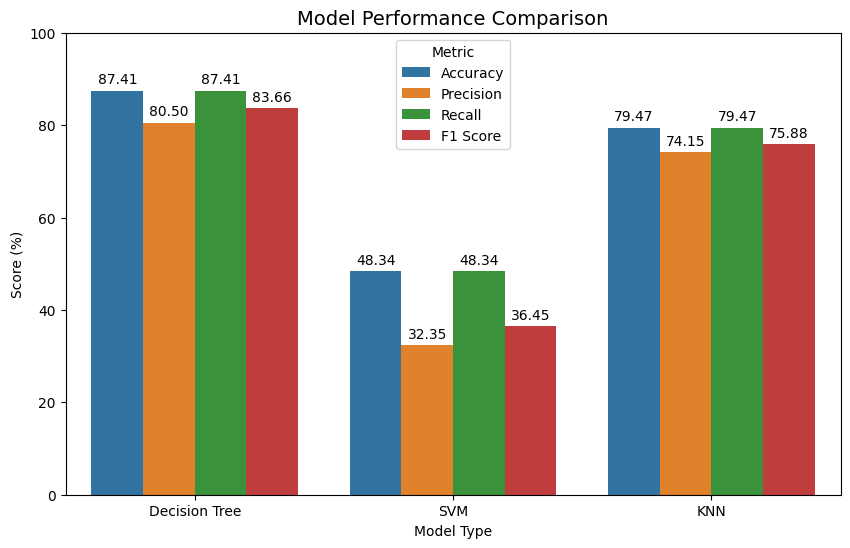

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='Model Type', y='Score', hue='Metric', palette='tab10')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=10, padding=3)

plt.title('Model Performance Comparison', fontsize=14)
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.legend(title='Metric')

plt.show()

## Hard voting ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier

# Combining individual models to form a Ensemble Model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Creating a hard voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('svm', svm_model),
    ('knn', knn_model),
], voting='hard')

# Fitting the ensemble model
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('svm', SVC(random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [ ]:
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
print("Ensemble Model (Hard Voting):")
print("F1 Score:", f1_score(y_test, y_pred_ensemble, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_ensemble, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_ensemble, average='weighted'))

Ensemble Model (Hard Voting):
F1 Score: 0.7602680723655831
Accuracy: 0.8079470198675497
Recall (Sensitivity): 0.8079470198675497
Precision: 0.7531884622550431


## Soft voting ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier

# Combining individual models to form a Ensemble Model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
svm_model = SVC(random_state=42, probability=True)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Creating a soft voting classifier
ensemble_model_soft = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('svm', svm_model),
    ('knn', knn_model),
], voting='soft')

# Fitting the ensemble model
ensemble_model_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
y_pred_ensemble_soft = ensemble_model_soft.predict(X_test)

# Evaluate the ensemble model
print("Ensemble Model (Soft Voting):")
print("F1 Score:", f1_score(y_test, y_pred_ensemble_soft, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble_soft))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_ensemble_soft, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_ensemble_soft, average='weighted'))

Ensemble Model (Soft Voting):
F1 Score: 0.8161453640363813
Accuracy: 0.8543046357615894
Recall (Sensitivity): 0.8543046357615894
Precision: 0.7866369996612823


## Comparing hard and soft voting ensembles

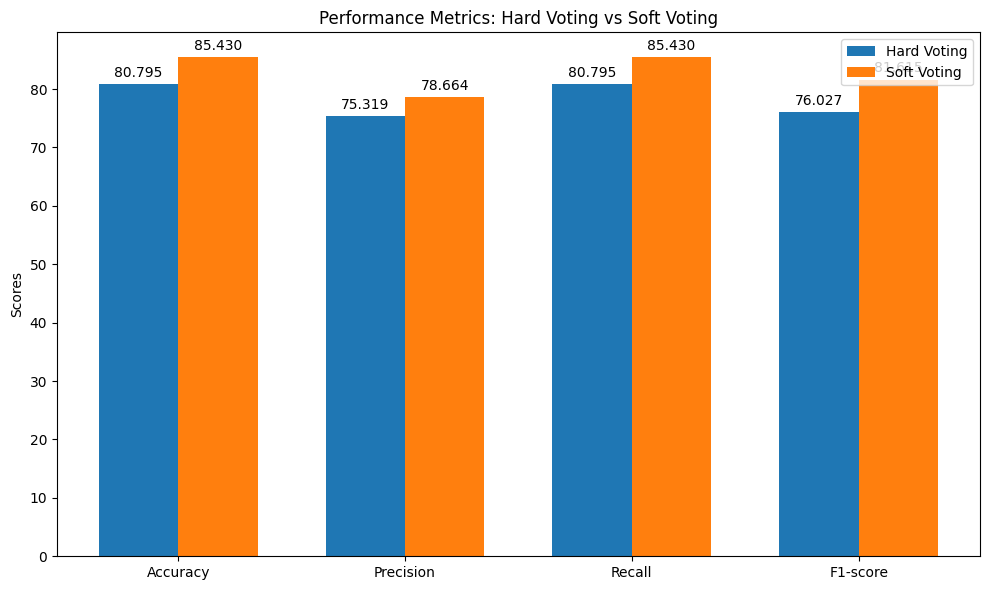

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred_hard = ensemble_model.predict(X_test)
y_pred_soft = ensemble_model_soft.predict(X_test)

# Calculate metrics for hard voting
hard_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_ensemble)*100,
    'Precision': precision_score(y_test, y_pred_ensemble, average='weighted')*100,
    'Recall': recall_score(y_test, y_pred_ensemble, average='weighted')*100,
    'F1-score': f1_score(y_test, y_pred_ensemble, average='weighted')*100
}

# Calculate metrics for soft voting
soft_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_ensemble_soft)*100,
    'Precision': precision_score(y_test, y_pred_ensemble_soft, average='weighted')*100,
    'Recall': recall_score(y_test, y_pred_ensemble_soft, average='weighted')*100,
    'F1-score': f1_score(y_test, y_pred_ensemble_soft, average='weighted')*100
}

# Prepare data for plotting
metrics_names = list(hard_metrics.keys())
hard_values = list(hard_metrics.values())
soft_values = list(soft_metrics.values())

x = np.arange(len(metrics_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, hard_values, width, label='Hard Voting')
rects2 = ax.bar(x + width/2, soft_values, width, label='Soft Voting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics: Hard Voting vs Soft Voting')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

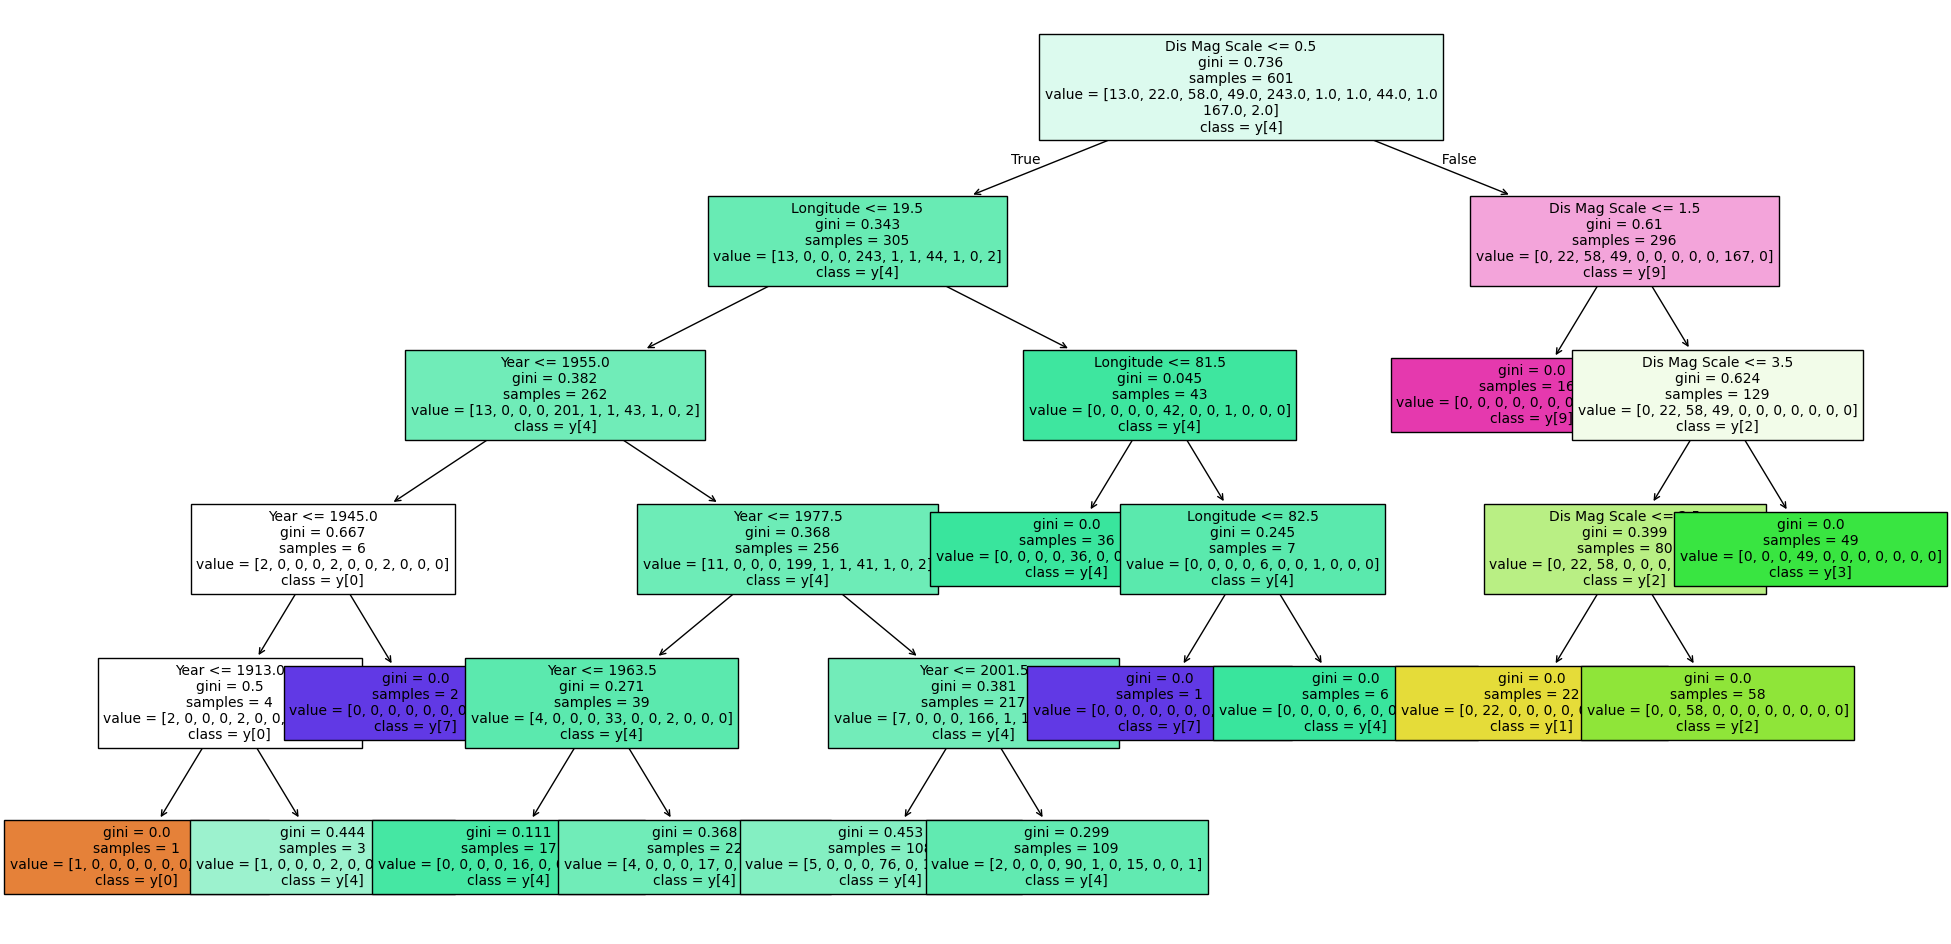

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract the decision tree from your ensemble
dt_model = ensemble_model.named_estimators_['dt']

# Plot the decision tree
plt.figure(figsize=(24, 12))
plot_tree(dt_model,
          filled=True,
          feature_names=X_train.columns,
          class_names=True,
          fontsize=10)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
import pickle
# Assuming your hard voting ensemble model is named 'ensemble_model'
filename = 'hard_voting_ensemble.pkl'
pickle.dump(ensemble_model, open(filename, 'wb'))

# Download the file
from google.colab import files
files.download(filename)

# Assuming your soft voting ensemble model is named 'ensemble_model_soft'
filename = 'soft_voting_ensemble.pkl'
pickle.dump(ensemble_model_soft, open(filename, 'wb'))

# Download the file
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>